<a href="https://colab.research.google.com/github/Ani-Das/ImageProcessing_Aniesh/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray


In [6]:
import os
datadir='/content/drive/MyDrive/Verzeo Minor Project/Images'
categories= ['Computers','Phones']
target = []
flat_data = []
for i in categories:
  path = os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array= imread(os.path.join(path,img))
    img_resize = resize(img_array,(150,150,1))     #Resize data

    flat_data.append(np.ndarray.flatten(img_resize)) #Flatten data
    target.append(i)
    #plt.imshow(img_resize)
    #plt.show()

flat_data = np.array(flat_data)
target = np.array(target)
    

In [18]:
d_frame= pd.DataFrame(flat_data)    #Create dataframe
d_frame['Target']= target
d_frame.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,22461,22462,22463,22464,22465,22466,22467,22468,22469,22470,22471,22472,22473,22474,22475,22476,22477,22478,22479,22480,22481,22482,22483,22484,22485,22486,22487,22488,22489,22490,22491,22492,22493,22494,22495,22496,22497,22498,22499,Target
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000146,0.003922,0.007843,0.024913,0.046551,0.061222,0.070588,0.068050,0.059699,0.054902,0.060429,0.113745,0.249255,0.387804,0.461660,0.466431,0.379636,0.323092,0.390508,0.403649,0.451837,0.414784,0.259255,0.290196,0.187569,0.115242,0.313288,0.159268,0.124551,0.261203,0.215166,0.109359,0.111327,0.039723,0.073634,...,0.186261,0.574471,0.786643,0.545556,0.419399,0.407843,0.396954,0.392157,0.400000,0.407843,0.411765,0.407843,0.423529,0.427451,0.431373,0.439216,0.443137,0.447059,0.446329,0.447059,0.450980,0.450980,0.447059,0.440092,0.439946,0.447059,0.443137,0.447059,0.450105,0.450980,0.457440,0.437255,0.419608,0.407843,0.411765,0.420115,0.423529,0.434856,0.457948,Computers
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,0.992157,0.813725,0.360392,0.341176,0.343922,0.345388,0.349020,0.352941,0.354118,0.356863,0.360784,0.366667,0.372549,0.377647,0.387059,0.396078,0.403922,0.407843,0.423835,...,0.491216,0.490706,0.486275,0.487294,0.487294,0.487192,0.486275,0.482353,0.482353,0.483373,0.486275,0.486275,0.486275,0.486275,0.486275,0.500784,0.860784,0.996078,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Computers
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.632916,0.642961,0.651326,0.660121,0.661880,0.667020,0.670211,0.673739,0.677014,0.680167,0.686647,0.692095,0.695310,0.696079,0.715071,0.716298,0.721853,0.743090,0.753803,0.767313,0.784288,0.798297,0.821956,0.844658,0.862406,0.899164,0.956340,0.983087,0.991595,0.994853,0.992869,0.994336,0.995623,0.996078,1.000000,1.000000,1.000000,1.000000,1.000000,Computers
3,0.792627,0.792627,0.792627,0.792232,0.796814,0.800137,0.801412,0.801520,0.802752,0.815944,0.816235,0.814199,0.808824,0.808490,0.819575,0.824680,0.842725,0.800598,0.796137,0.806108,0.818255,0.824258,0.822686,0.818863,0.818020,0.817108,0.843029,0.821029,0.817098,0.811422,0.805899,0.827353,0.825480,0.824258,0.825225,0.824310,0.828314,0.835275,0.840592,0.838974,...,0.376435,0.379961,0.377925,0.374837,0.371569,0.368627,0.368627,0.369059,0.368807,0.363503,0.361108,0.359804,0.338235,0.319608,0.317899,0.321641,0.321137,0.321137,0.321137,0.321137,0.321922,0.306026,0.325480,0.319176,0.343154,0.367216,0.343621,0.382350,0.345735,0.379814,0.401814,0.331020,0.331216,0.322683,0.322000,0.321709,0.318510,0.323961,0.325922,Computers
4,0.015686,0.065490,0.145098,0.149412,0.256497,0.328497,0.130719,0.040863,0.136971,0.169302,0.307195,0.254914,0.314065,0.259974,0.246923,0.233722,0.224742,0.150292,0.141438,0.113239,0.180268,0.301356,0.250379,0.200568,0.190634,0.213119,0.195097,0.256793,0.306724,0.309804,0.309804,0.306243,0.306885,0.301830,0.290588,0.290196,0.290196,0.290196,0.290196,0.294118,...,0.440261,0.429098,0.394356,0.391522,0.389166,0.381462,0.236950,0.160648,0.206304,0.212286,0.231461,0.247259,0.198562,0.200000,0.227739,0.328784,0.337255,0.255075,0.126118,0.137527,0.165607,0.149534,0.165527,0.269642,0.384044,0.190844,0.240383,0.434304,0.496889,0.527493,0.355922,0.189882,0.167981,0.268647,0.451765,0.458824,0.458824,0.481595,0.400941,Computers


In [8]:
from sklearn.model_selection import train_test_split
x = flat_data
y = target
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,stratify=y)

from sklearn.svm import SVC
model = SVC()

model.fit(x_train,y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_pred,y_test)

0.7142857142857143

In [9]:
confusion_matrix(y_pred,y_test)

array([[4, 1],
       [3, 6]])

In [10]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

   Computers       0.57      0.80      0.67         5
      Phones       0.86      0.67      0.75         9

    accuracy                           0.71        14
   macro avg       0.71      0.73      0.71        14
weighted avg       0.76      0.71      0.72        14



In [12]:
from sklearn.model_selection import GridSearchCV

model = SVC()
param = {
    'kernel':['linear','rbf','poly'],
    'C':[0.1,1,10,100]
}

grid = GridSearchCV(model,param,cv=5)
grid.fit(x_train,y_train)
grid.best_params_

{'C': 1, 'kernel': 'rbf'}

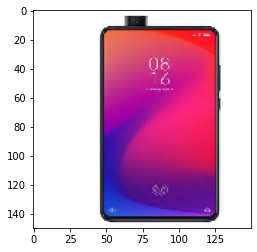

In [34]:
import keras
from keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/Verzeo Minor Project/Images/test.JPG',target_size=(150,150,1))
img = image.img_to_array(img)
img = img/255

img = np.array(img)
flat_data = np.array(img.flatten())


#y_pred = categories[y_pred[0]]
#st.title(f'Predicted Output: {y_pred}')
plt.imshow(img)

